- Dataset yang digunakan untuk mengklasifikasi gambar apa ? Jawab : Klasifikasi gambar tingkat kematangan buah mangga, seperti gambar mangga mentah, mangga matang , dan mangga busuk
- Sebutkan jumlah image pada masing – masing kelas ? Jawab : 240 Image
- Dataset dibagi menjadi berapa Folder dan berapa jumlah masing - masing ? Jawab : 80 Image per Folder
- Berapa Batch size yang digunakan ? Jawab : 62
- Image dataset diubah menjadi ukuran berapa sebelum dilakukan convolution ? Jawab : 256
- Berapa jumlah iterasi yang digunakan ? Jawab : 62
- sebutkan augmentasi apa saja yang dilakukan dalam pipeline source code yang anda kerjakan ? Jawab : resizing,dan rescale
- sebutkam model layer yang digunakan pada tugas anda ? Jawab : Conv2D dan MaxPooling2D
- optimizer yang digunakan pada tugas anda ? Jawab : Adam
- Berapa total parameter yang digunakan dan parameter yang ditrain ? Jawab : 5 Parameter
- Sebutkan accuracy dan loss pada epoch terakhir ? Jawab : 1.0000
- Sebutkan accuracy yang tertinggi dan epoch ke berapa ? Jawab : 1.0000 di epoch 62
- Apakah prediksi gambar yang dilakukan sudah benar ? Jawab : Benar

**Eksperimen**

- No 1
-  - 80% train : 10% val : 10% test, => 1.0000,
-  - 70% train : 15% val : 15% test, => 0.9595,
-  - 80% train : 20% val, => 1.0000,
-  - 70% train : 30% => 0.5833,

- No 2 Augmentasi Data => Flip dan Rotasi(0.5833)

- No 3 Batch Size

-   - Batch Size = 40(0.9211)
-   - Batch Size = 80(0.9062)

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [2]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [3]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=62
CHANNELS=3

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/mangga/mangga_image/train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 198 files belonging to 3 classes.


2022-06-22 13:58:23.163385: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 13:58:23.173812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 13:58:23.174570: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-22 13:58:23.175724: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [5]:
class_names = dataset.class_names
class_names

['mangga_busuk', 'mangga_masak', 'mangga_muda']

In [6]:
len(dataset)

4

In [7]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

2022-06-22 13:58:24.199491: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(62, 256, 256, 3)
tf.Tensor(
[[[ 21.16275   57.815125  23.220352]
  [ 29.679718  65.28519   32.434586]
  [ 34.240433  71.97977   36.917465]
  ...
  [134.30113  129.36894  128.83504 ]
  [134.92776  129.53323  129.2305  ]
  [132.46356  127.765625 127.11459 ]]

 [[ 23.924728  63.517517  28.153336]
  [ 24.432571  63.578125  27.852768]
  [ 20.642578  56.74489   23.152496]
  ...
  [117.19847  113.12245  112.16046 ]
  [143.58221  138.33984  137.96103 ]
  [155.20796  150.81151  150.00974 ]]

 [[ 26.804886  68.23102   28.639572]
  [ 26.342697  66.37816   30.072418]
  [ 24.027344  63.457428  27.887512]
  ...
  [135.57521  130.57991  130.07756 ]
  [151.64648  146.6546   146.15054 ]
  [157.39879  153.39879  152.39879 ]]

 ...

 [[ 31.626602  30.107422  21.981369]
  [ 24.559036  22.77359   16.251053]
  [ 18.024796  17.20137   12.789459]
  ...
  [136.73106  135.30098  136.01602 ]
  [133.86523  132.83789  133.35156 ]
  [131.48633  130.0602   129.63957 ]]

 [[ 35.897446  32.50099   24.492126]
  [ 27.6

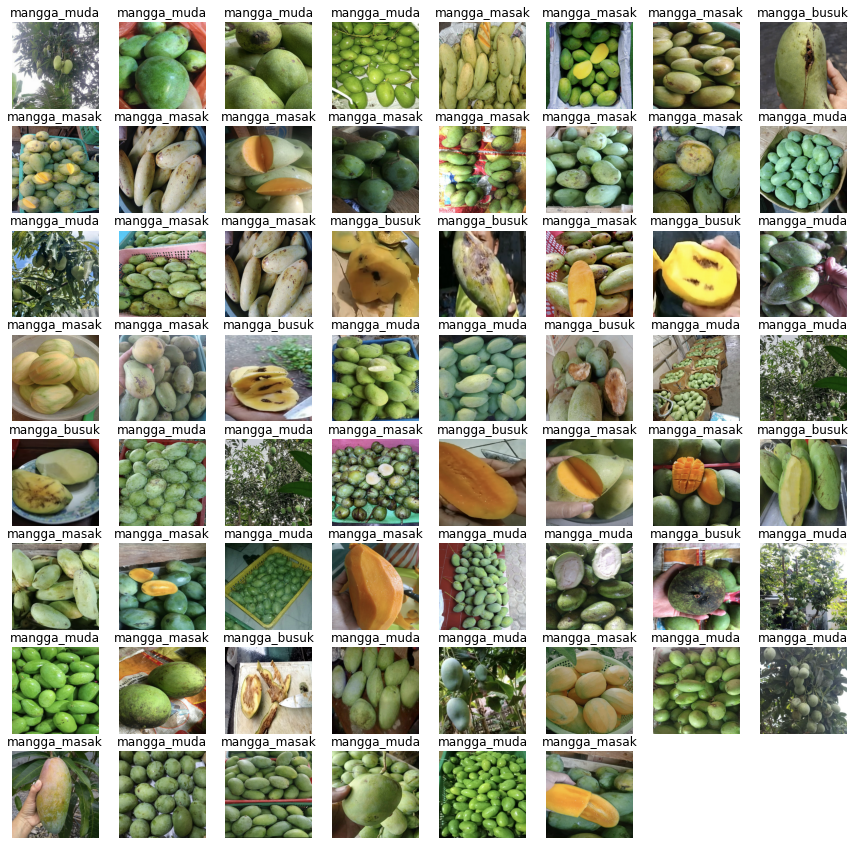

In [8]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [9]:
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.3, test_split=0.0, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [10]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [11]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [12]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [13]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (62, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (62, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (62, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (62, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (62, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (62, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (62, 60, 60, 64)         

In [16]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=2,
    epochs=EPOCHS,
)

Epoch 1/62


2022-06-22 13:58:35.592715: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2/2 - 8s - loss: 2.1204 - accuracy: 0.3108 - val_loss: 1.9216 - val_accuracy: 0.4167
Epoch 2/62
2/2 - 0s - loss: 1.6856 - accuracy: 0.3649 - val_loss: 1.3228 - val_accuracy: 0.3333
Epoch 3/62
2/2 - 0s - loss: 1.2622 - accuracy: 0.2432 - val_loss: 1.0485 - val_accuracy: 0.5000
Epoch 4/62
2/2 - 0s - loss: 1.1559 - accuracy: 0.3919 - val_loss: 1.1811 - val_accuracy: 0.2500
Epoch 5/62
2/2 - 0s - loss: 1.3883 - accuracy: 0.2297 - val_loss: 1.1171 - val_accuracy: 0.5000
Epoch 6/62
2/2 - 0s - loss: 1.2059 - accuracy: 0.4054 - val_loss: 1.0082 - val_accuracy: 0.4167
Epoch 7/62
2/2 - 0s - loss: 1.0989 - accuracy: 0.4189 - val_loss: 1.2399 - val_accuracy: 0.1667
Epoch 8/62
2/2 - 0s - loss: 1.2849 - accuracy: 0.2703 - val_loss: 1.2705 - val_accuracy: 0.2500
Epoch 9/62
2/2 - 0s - loss: 1.2333 - accuracy: 0.2703 - val_loss: 1.1181 - val_accuracy: 0.6667
Epoch 10/62
2/2 - 0s - loss: 1.1424 - accuracy: 0.3919 - val_loss: 1.0941 - val_accuracy: 0.5000
Epoch 11/62
2/2 - 0s - loss: 1.1572 - accuracy: 0.

In [17]:
model.evaluate(test_ds)

1/1 [==============================] - 2s 2s/step - loss: 0.8328 - accuracy: 0.5968


[0.8328378796577454, 0.5967742204666138]

In [18]:
acc = history.history['accuracy']
loss = history.history['loss']

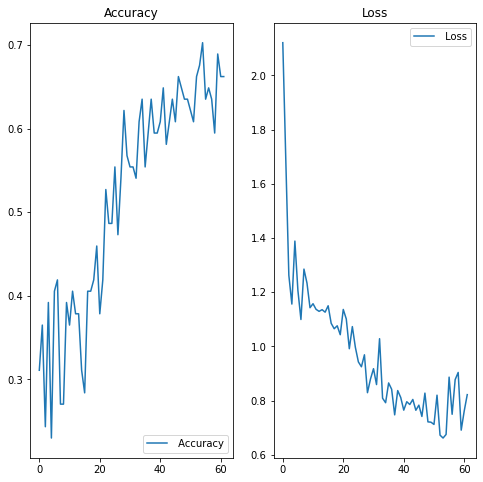

In [19]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

mangga_masak


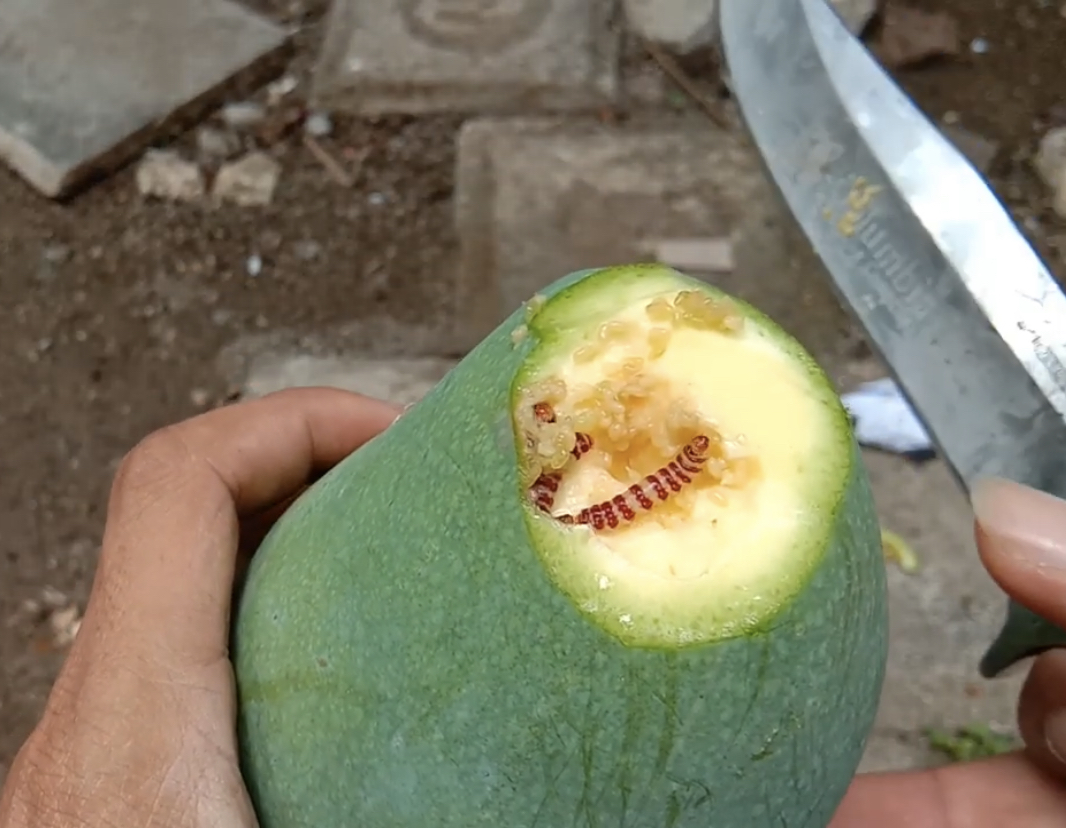

In [20]:
image_path = "../input/mangga/mangga_image/valid/mangga_busuk/Mangga busuk 100.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
pred = model.predict(scaled_img)
output = class_names[np.argmax(pred)]
print(output)
image

mangga_masak


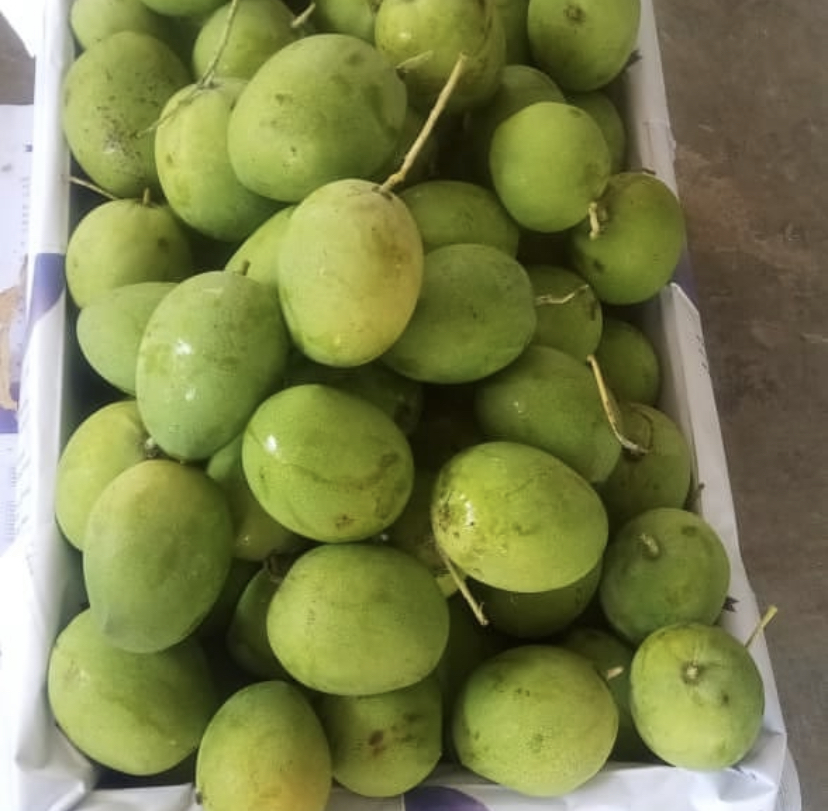

In [21]:
image_path = "../input/mangga/mangga_image/valid/mangga_masak/Mangga masak  30.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
pred = model.predict(scaled_img)
output = class_names[np.argmax(pred)]
print(output)
image

mangga_muda


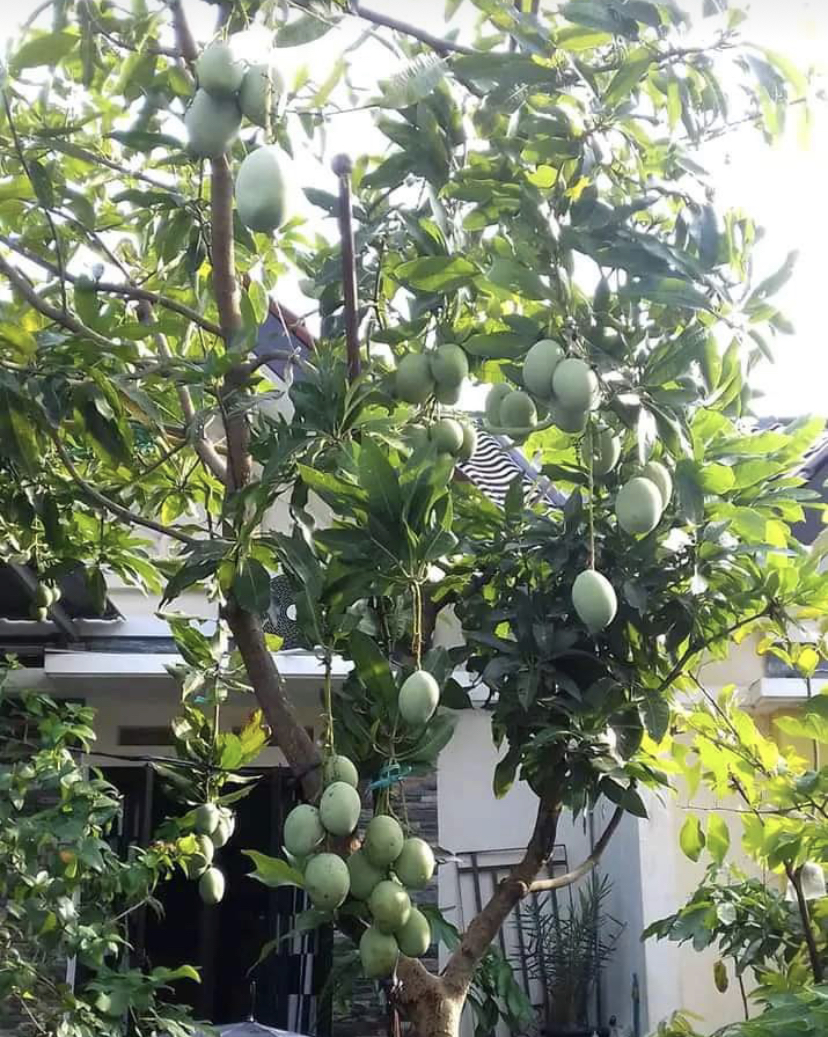

In [22]:
image_path = "../input/mangga/mangga_image/valid/mangga_muda/IMG_6212.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
pred = model.predict(scaled_img)
output = class_names[np.argmax(pred)]
print(output)
image

In [23]:
model.save("Klasifikasi Tingkat Kematangan Mangga.h5")